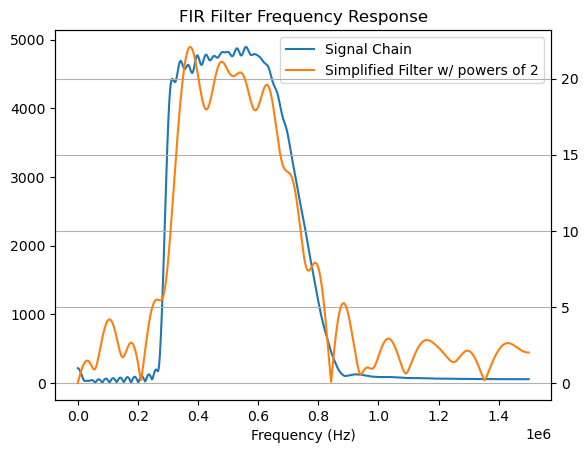

Noise RMS: 0.99940
Filtered RMS: 10.26239
Double-filtered RMS: 189.86807
Ratio of RMS2 / RMS1: 18.50135


In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import lfilter, freqz
from scipy import fft

signal_chain_impulse_response = [ 5.04503902e+01, -1.12545987e+02, -1.04093176e+02,  1.94431729e+02,
  2.29691990e+02, -2.83741903e+02, -5.26255092e+02,  1.77403461e+02,
  8.97102066e+02,  3.60130942e+02, -8.44514638e+02, -1.00381141e+03,
  9.21518314e+01,  9.50299985e+02,  6.74887883e+02, -8.00379710e+01,
 -4.73143089e+02, -4.61061194e+02, -2.85860047e+02,  2.65032434e+00,
  3.11073211e+02,  4.18987060e+02,  2.61820459e+02, -1.16049466e+01,
 -2.36069577e+02, -3.20863231e+02, -2.44201811e+02, -6.15146451e+01,
  1.27301224e+02,  2.37776449e+02,  2.32307266e+02,  1.27635084e+02,
 -2.30518423e+01, -1.54552781e+02, -2.11187258e+02, -1.73240462e+02,
 -6.56401685e+01,  5.91043049e+01,  1.49621435e+02,  1.73735929e+02,
  1.24941069e+02,  2.72209585e+01, -7.54590794e+01, -1.41977511e+02,
 -1.49878088e+02, -9.84649492e+01, -9.51643521e+00,  7.71902138e+01,
  1.25304942e+02,  1.21673944e+02,  7.41597684e+01,  8.05993100e-02,
 -7.50919376e+01, -1.19732921e+02, -1.13411848e+02, -6.18889894e+01,
  8.81257117e+00,  6.99605718e+01,  1.00710037e+02,  9.15102387e+01,
  4.72735275e+01, -1.31304204e+01, -6.51094601e+01, -8.98461426e+01,
 -8.07868033e+01, -4.37925148e+01,  6.40473450e+00,  5.15857183e+01,
  7.53185244e+01,  6.88318008e+01,  3.61667698e+01, -7.57925065e+00,
 -4.56615536e+01, -6.66670313e+01, -6.43612264e+01, -3.85945391e+01,
  6.16783518e-01,  3.57407648e+01,  5.33849028e+01,  5.12016043e+01,
  3.29995552e+01,  3.86621066e+00, -2.74924671e+01, -4.89241490e+01,
 -5.24712265e+01, -3.86299866e+01, -1.25080152e+01,  1.84611494e+01,
  4.27640638e+01,  4.85912314e+01,  3.33179020e+01,  6.10011848e+00,
 -2.00911922e+01, -3.69132378e+01, -4.19154042e+01, -3.51603823e+01,
 -1.72613266e+01,  8.35918608e+00,  3.19571949e+01,  4.05603784e+01,
  2.90633601e+01,  6.33776195e+00, -1.37856697e+01, -2.52158677e+01,
 -2.93517998e+01, -2.67140622e+01, -1.60424606e+01,  4.30873152e-02,
  1.48558734e+01,  2.31810198e+01,  2.35309701e+01,  1.59763055e+01,
  1.64969483e+00, -1.48809436e+01, -2.59379206e+01, -2.63462895e+01,
 -1.79178921e+01, -6.13945887e+00,  5.99299984e+00,  1.72573581e+01,
  2.31897756e+01,  1.80700201e+01,  3.00336870e+00, -1.28844368e+01,
 -2.08991034e+01, -1.94664037e+01, -1.25256404e+01, -4.98553147e+00]

simplified_matched_filter = [ 0,  0,  0,  1,  1, -1, -2,  1,  4,  1, -4, -4,  0,  4,  2,  0, -2,
       -2, -1,  0,  1,  2,  1,  0, -1, -1, -1,  0,  1,  1,  1,  1,  0, -1,
       -1, -1,  0,  0,  1,  1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0]


# Example: Use your FIR coefficients, e.g., simplified_matched_filter
w_sc, h_sc = freqz(signal_chain_impulse_response, worN=8000)
w_hdl, h_hdl = freqz(simplified_matched_filter, worN=8000)
nyq_freq = 1500000

fig, ax1 = plt.subplots()
line1, = ax1.plot(nyq_freq*w_sc / np.pi, np.abs(h_sc), color = "C0", label = "Signal Chain")

ax2 = ax1.twinx()
line2, = ax2.plot(nyq_freq*w_hdl / np.pi, np.abs(h_hdl), color = "C1", label = "Simplified Filter w/ powers of 2")

plt.title('FIR Filter Frequency Response')
ax1.set_xlabel('Frequency (Hz)')
# plt.ylabel('')
plt.grid(True)

lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels)

plt.show()


sample_num = 1000000
noise = np.random.normal(loc=0, scale=1, size=sample_num)
filtered_noise = lfilter(np.flip(simplified_matched_filter), [1], noise)
double_filtered_noise = lfilter(np.flip(simplified_matched_filter), [1], filtered_noise)
# noise_filtered_fft = fft.fft(double_filtered_noise)
# freqs = fft.fftfreq(sample_num)
rms0 = np.sqrt(np.mean(np.square(noise)))
rms1 = np.sqrt(np.mean(np.square(filtered_noise)))
rms2 = np.sqrt(np.mean(np.square(double_filtered_noise)))

print("Noise RMS: %0.5f"%rms0)
print("Filtered RMS: %0.5f"%rms1)
print("Double-filtered RMS: %0.5f"%rms2)

print("Ratio of RMS2 / RMS1: %0.5f"%(rms2/rms1))

In [ ]:
sample_num = 1000000
noise = np.random.normal(loc=0, scale=1, size=sample_num)
filtered_noise = lfilter(signal_chain_impulse_response, [1], noise)
noise_filtered_fft = fft.fft(filtered_noise)
freqs = fft.fftfreq(sample_num)

filtered_noise_hdl = lfilter(simplified_matched_filter, [1], noise)
noise_filtered_fft_hdl = fft.fft(filtered_noise_hdl)

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(freqs, noise_filtered_fft, color="C0")

ax2 = ax1.twinx()

ax2.plot(freqs, noise_filtered_fft_hdl, color="C1")
plt.plot()

In [ ]:

# Example: Use your FIR coefficients, e.g., simplified_matched_filter
w_sc, h_sc = freqz(signal_chain_impulse_response, worN=8000)
w_hdl, h_hdl = freqz(simplified_matched_filter, worN=8000)

fig, ax1 = plt.subplots()
ax1.plot(w_sc / np.pi, 20 * np.log10(np.abs(h_sc)), color = "C0", label = "Signal Chain")

ax2 = ax1.twinx()
ax2.plot(w_hdl / np.pi, 20 * np.log10(np.abs(h_hdl)), color = "C1", label = "Simplified Filter w/ powers of 2")

plt.title('FIR Filter Frequency Response')
ax2.xlabel('Normalized Frequency (×π rad/sample)')
ax2.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:

# Example: Use your FIR coefficients, e.g., simplified_matched_filter
w_sc, h_sc = freqz(signal_chain_impulse_response, worN=8000)
w_hdl, h_hdl = freqz(simplified_matched_filter, worN=8000)
nyq_freq = 1500000

fig, ax1 = plt.subplots()
line1, = ax1.plot(nyq_freq*w_sc / np.pi, np.abs(h_sc), color = "C0", label = "Signal Chain")

ax2 = ax1.twinx()
line2, = ax2.plot(nyq_freq*w_hdl / np.pi, np.abs(h_hdl), color = "C1", label = "Simplified Filter w/ powers of 2")

plt.title('FIR Filter Frequency Response')
ax1.set_xlabel('Frequency (Hz)')
# plt.ylabel('')
plt.grid(True)

lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels)

# plt.legend()
plt.savefig("temp.png")
plt.show()

In [ ]:

rms = np.sqrt(np.mean(np.square(noise)))


In [ ]:
sample_num = 1000000
noise = np.random.normal(loc=0, scale=1, size=sample_num)
filtered_noise = lfilter(simplified_matched_filter, [1], noise)
double_filtered_noise = lfilter(simplified_matched_filter, [1], filtered_noise)
# noise_filtered_fft = fft.fft(double_filtered_noise)
# freqs = fft.fftfreq(sample_num)
rms0 = np.sqrt(np.mean(np.square(noise)))
rms1 = np.sqrt(np.mean(np.square(filtered_noise)))
rms2 = np.sqrt(np.mean(np.square(double_filtered_noise)))

print("Noise RMS: %0.5f"%rms0)
print("Filtered RMS: %0.5f"%rms1)
print("Double-filtered RMS: %0.5f"%rms2)

print("Ratio of RMS2 / RMS1: %0.5f"%(rms2/rms1))

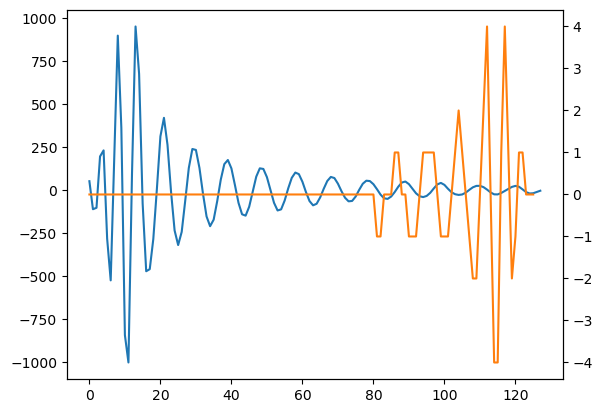

In [7]:
fig, ax1 = plt.subplots()
ax1.plot(signal_chain_impulse_response, color="C0")
ax2 = ax1.twinx()
ax2.plot(np.flip(simplified_matched_filter), color = "C1")